# About the Data

This dataset is part of previous kaggle competition. 
It analyses the showup rates for the patients, and what factors contribute towards the showup/No showup rate.

The dataset has information about 110527 patients (110527 rows and 14 columns.)

The column informations are  as below:

PatientId - Identification of a patient 

AppointmentID - Identification of each appointment 

Gender -  Male or Female 

ScheduledDay - The day the appointment was Scheduled

AppointmentDay- The day of the actuall appointment

Age -  How old is the patient

Neighbourhood - Where the appointment takes place.

Scholarship - Ture of False 

Hipertension, Diabetes, Alcoholism, Handcap- shows the  disease for the patient

SMS_received - 0 or 1 , 0 - reminder not sent to the patient. 1-  reminder sent to the patient.

Show_up- Yes (the patient shows up on the appointment day ) or No (the patient does not show up on the appointment day ) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
%matplotlib inline

In [115]:
df = pd.read_csv('Medical_appointments.csv')

We will get the basic information about the data that we had loaded in the previous step.

In [116]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,29900000000000,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,559000000000000,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4260000000000,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,868000000000,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8840000000000,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [117]:
df.shape

(110527, 14)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Show_up           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


# Data Cleaning
We will correct some of the inconsistencies in the data:

1. PatientId is an Integer and not Float. So, we will convert it into int64.
2. Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.

In [119]:
df.PatientId = df.PatientId.astype(np.int64)
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date.astype('datetime64[ns]')
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date.astype('datetime64[ns]')


In [120]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [121]:
df.Show_up.unique()

array(['No', 'Yes'], dtype=object)

In [122]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In the below code we will check few details about the patients with Age 0 and -1.

In [123]:
df[df.Age < 0].shape[0]

1

As there is only 1 patient with Age less than 0, we can leave that record assuming that there was a typo.

In [128]:
df = df[df.Age >= 0]

In [129]:
age = df.Age.unique()
print(sorted(age))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [130]:
df[df.Age == 0].shape[0]

3539

we have 3539 patients with Age equal to 0. 
we are assuming that these are the Newborn babies. 

Usually babies doesn't have Hypertension or Diabetes or Alcoholism.

We will check these features for the above records to see if our assumption is correct.

In [131]:
df[(df.Age <= 0) & ((df.Hipertension == 1) | (df.Diabetes == 1) | (df.Alcoholism == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up


In [132]:
df.ScheduledDay.describe()

count                  110526
unique                    111
top       2016-05-03 00:00:00
freq                     4238
first     2015-11-10 00:00:00
last      2016-06-08 00:00:00
Name: ScheduledDay, dtype: object

We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's around 7 months of data.

In [133]:
df.AppointmentDay.describe()

count                  110526
unique                     27
top       2016-06-06 00:00:00
freq                     4691
first     2016-04-29 00:00:00
last      2016-06-08 00:00:00
Name: AppointmentDay, dtype: object

From the above detail we can see that AppointmentDay ranges from 2016-04-29 to 2016-06-08. The AppointmentDay spans just above 1 Month in contrast to the ScheduledDay that spans around 7 Months.

In [134]:
df.Neighbourhood.unique().size

81

Get Day of the Week for ScheduledDay and AppointmentDay to see if there are many No Show up over the weekends. Days for ScheduledDay and AppointmentDay also helps us to see if there is a particular pattern where most patients are coming for a visit.

In [135]:
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.weekday_name

In [136]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up,ScheduledDay_DOW,AppointmentDay_DOW
0,29900000000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,559000000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4260000000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,868000000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8840000000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


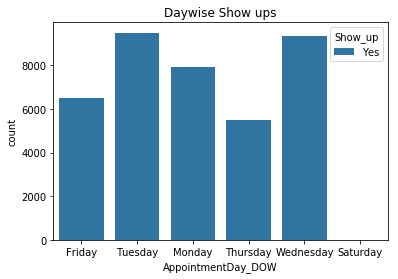

In [137]:
sns.countplot(x='AppointmentDay_DOW',hue='Show_up', data= df[df.Show_up=='Yes'])
plt.title('Daywise Show ups')
plt.show()

The show up rate is more in Tuesday and Wednesday than other days. 

Ideally the AppointmentDay should be on or after the ScheduledDay. Below we will check if there are any records where there is an inconsistency. In case if the ScheduledDay is after the AppointmentDay we will consider it as an error and change the ScheduledDay to the AppointmentDay.

In [138]:
df[df.AppointmentDay < df.ScheduledDay]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up,ScheduledDay_DOW,AppointmentDay_DOW
27033,7840000000000,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday
55226,7900000000000,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday
64175,24300000000000,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday
71533,998000000000000,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday
72362,3790000000000,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday


In [139]:
df.loc[df.AppointmentDay < df.ScheduledDay,'ScheduledDay'] = df.loc[df.AppointmentDay < df.ScheduledDay, 'AppointmentDay']

In [140]:
df.iloc[[27033,55226,64175,71533,72362]]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up,ScheduledDay_DOW,AppointmentDay_DOW
27033,7840000000000,5679978,M,2016-05-09,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday
55226,7900000000000,5715660,F,2016-05-17,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday
64175,24300000000000,5664962,F,2016-05-04,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday
71533,998000000000000,5686628,F,2016-05-05,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday
72362,3790000000000,5655637,M,2016-05-03,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday


Check the Waiting Time in Days for the Patients.

In [141]:
df['Waiting_Time_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [142]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
110522,2570000000000,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,35
110523,3600000000000,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,35
110524,15600000000000,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41
110525,92100000000000,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41
110526,378000000000000,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41


In [144]:
waiting_time = df.Waiting_Time_days.unique() 
print(sorted(waiting_time))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


Create categories for waiting Time
Let's create categories like Immediate, then within a week, within two weeks, within a month, within two months, within three months,within 6 months etc.

In [145]:
bins = [-10,0,7,15,30,60,90,120,180]
labels = ['Immediate','Within a week','2week','a month','2month', '3month','4month', 'half a month']
wait_period = pd.cut(df.Waiting_Time_days, bins, labels=labels)
df['Wait_period'] = wait_period

In [146]:
df['Wait_period'].unique()

[Immediate, Within a week, 2week, a month, 2month, 3month, 4month, half a month]
Categories (8, object): [Immediate < Within a week < 2week < a month < 2month < 3month < 4month < half a month]

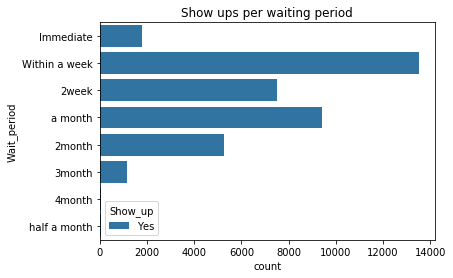

In [147]:
ax= sns.countplot(y='Wait_period', hue='Show_up', data=df[df.Show_up=='Yes'] )
plt.title('Show ups per waiting period')
plt.show()


There is no particular effect of waiting period on showups.

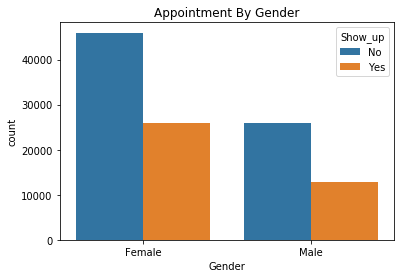

In [148]:
ax= sns.countplot(x='Gender', hue='Show_up', data=df )
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.title('Appointment By Gender')
plt.show()

Show_up        No       Yes
Gender                     
F        0.639597  0.360403
M        0.667227  0.332773


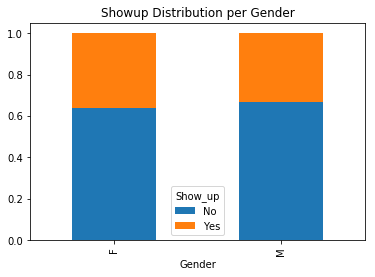

In [149]:
table = df.pivot_table(index = 'Gender', columns = 'Show_up', values='PatientId', aggfunc='count')
table2 = table.div(table.sum(1), axis=0)
print(table2)
table2.plot(kind='bar',stacked=True)
plt.title('Showup Distribution per Gender')
plt.show()

From the above two visualizations, we can find that 'Female' patients usually have more appointments than 'Male' patients. But the Show up  distribution across Male and Female is almost the same.

We will draw a boxplot for the Age feature to check it's distribution.

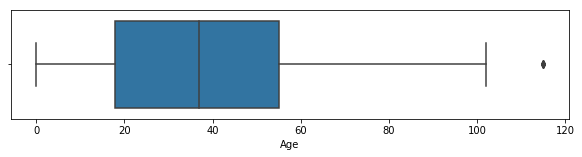

In [150]:
plt.figure(figsize=(10,2))
sns.boxplot( df.Age)
plt.show()

From the above BoxPlot we can find that the Median Age is around 40 and the IQR is between 18 and 55 with a few outliers.

Create categories for Age and check the showups for different age category.

In [151]:
bins = [0,2,6,18,40,65,np.inf]
labels=["Baby","Kid","Teenager","Young adults", "Adult","Elder"]
Age_category = pd.cut(df.Age, bins, labels=labels)
df['Age_category'] = Age_category


In [152]:
df.Age_category.unique()

[Adult, Teenager, Elder, Young adults, Kid, Baby, NaN]
Categories (6, object): [Baby < Kid < Teenager < Young adults < Adult < Elder]

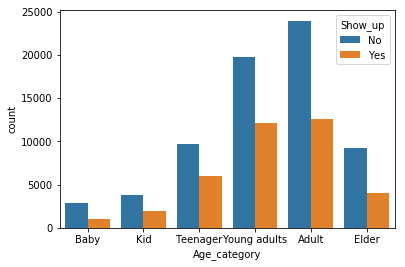

In [153]:
#plt.figure(figsize=(10,5))
ax= sns.countplot(x='Age_category', hue='Show_up', data=df )
plt.show()

The no show ups are more than show-ups for every age category.

In [645]:
df.Hipertension.unique()

array([1, 0], dtype=int64)

In [646]:
df.Diabetes.unique()

array([0, 1], dtype=int64)

In [647]:
df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [648]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [154]:
def find_disease(row):
    str1= ''
    
    if row['Hipertension'] == 1:
        str1 = str1 + ','+ 'HiperTension'  
    if row['Diabetes'] == 1:
        str1 =  str1 + ','+'Diabetes' 
        
    if row['Alcoholism'] == 1:
        str1 = str1 + ','+ 'Alcoholism'  
    
    if row['Handcap'] !=0 :
        str1 =   str1 + ','+'Handcap'
    
    return str1.strip(',')
    
df['Disease'] = df[["Diabetes","Hipertension","Alcoholism","Handcap"]].apply(find_disease, axis=1)

In [155]:
df[(df.Hipertension != 1 ) & (df.Diabetes != 1 ) & (df.Alcoholism != 1 ) & (df.Handcap != 1 )].shape

(84223, 20)

In [156]:
df.Disease.replace('', np.nan, inplace=True)

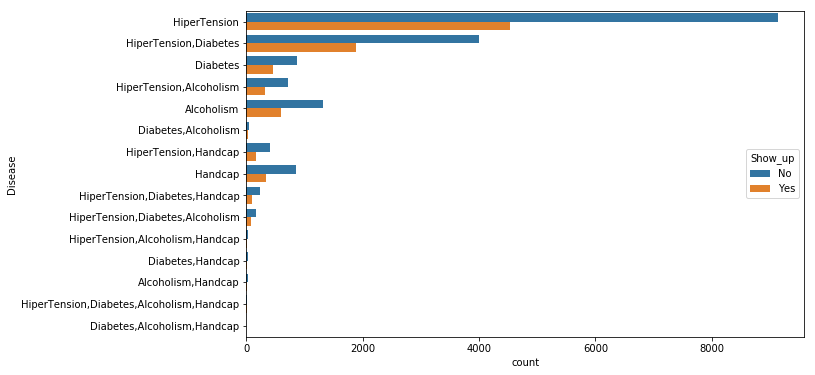

In [157]:
plt.figure(figsize=(10,6))
sns.countplot(y='Disease', hue= 'Show_up',  data= df)
plt.show()

There are more patients with HiperTension. For every health condition, no show up is more than show ups.

Let's analyze how many patients received the reminder for the appointment.

In [653]:
df['SMS_received'].value_counts(normalize=True)*100

0    67.897437
1    32.102563
Name: SMS_received, dtype: float64

Approximately 68% of the total population did not receive SMS while 32% received SMS. The below is the visual analysis for the same.

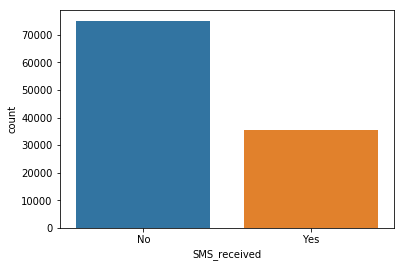

In [76]:
ax = sns.countplot(x='SMS_received',  data=df )
ax.set_xticklabels(['No','Yes'])
plt.show()

Let's analyze the show up based on sms received column.

SMS_received  Show_up
0             No         83.296466
              Yes        16.703534
1             No         26.075193
              Yes        73.924807
Name: Count, dtype: float64


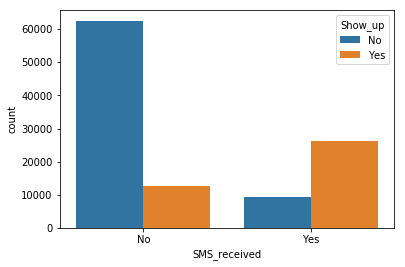

In [158]:
sms_recvd = df.groupby(['SMS_received','Show_up'])['Show_up'].count().rename('Count')
sms_recvd_pcts = sms_recvd.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
print(sms_recvd_pcts)
ax = sns.countplot(x='SMS_received', hue='Show_up', data=df )
ax.set_xticklabels(['No','Yes'])
plt.show()

Out of the people who did not received SMS - 
Approximately 83% didn't show up while other 17% show up for the appointment.

Out of the people who received SMS - 
74% show up while other 26% didn't show up.

# Research Proposal:

Problem:

A person makes a doctor appointment, receives all the instructions but don't show up. 

Hypothesis:

Our hypothesis here is if patients will get SMS , the show up % can be increased.

The control version : patients who don't receive SMS reminders

The test version : patients who receive SMS reminders

Solution:

Send reminder SMS and check if that improves the show up rate.

Rollout Plan:

Often times, though 50:50 rollouts are the fastest, a gradual rollout will be used to ensure that there are no negative consequences of the experiment or if things are broken or severely degraded it can be rolled back quickly. 

In this case the gradual roll-out will begin with two weeks at 10% and then two more weeks at 30% patients .

Track show up rates on a daily basis for patients in the test and control groups over the next 2 weeks. If there are any issues, we will be able to capture them quickly with daily monitoring. if show up counts increased in this time frame, but not with a significant amount, observe for two more weeks before deciding. If it didnt change we may drop this idea.

If there are no production, technical, or severe business issues in 2 weeks, roll out to the more test group members. Continue daily monitoring of results for another 2 weeks after promotion offer extended.  


Success Metric:
Our success metric will be number of show ups. 

Other Things to Do:

The infrastructure should be ready, if any, before rolling out. In this case that means making sure the SMS is set up properly to be sent out when the experiment turns on. Check to make sure these target users are not involved in any other tests or marketing campaigns. 


# Two Weeks In

In [658]:
df = pd.read_csv('Medical_appointments_2_weeks.csv')

In [659]:
df.Show_up.replace(['No','Yes'],[0,1], inplace= True)

In [660]:
# How large is each group?
print('Control Sample Size:', len(df[df.SMS_received == 0]))
print('Test Sample Size:', len(df[df.SMS_received == 1]))
print('test proportion:', df.SMS_received.mean())
print()
# What is the signup rate of test and control?
print('test signup rate : ', df[df.SMS_received == 1].Show_up.mean())
print('control signup rate: ', df[df.SMS_received == 0].Show_up.mean())

print('Ttest:', stats.ttest_ind(df[df.SMS_received == 1].Show_up, df[df.SMS_received == 0].Show_up))



Control Sample Size: 93996
Test Sample Size: 16531
test proportion: 0.14956526459598107

test signup rate :  0.348012824390539
control signup rate:  0.33631218349717007
Ttest: Ttest_indResult(statistic=2.9328225187773538, pvalue=0.0033596475702376903)


We can see a slight improvement here. 

But We could continue with the rollout plan for another 2 weeks (with say 30% patients getting the SMS) before implementing it.

# Two more Weeks In

In [661]:
df = pd.read_csv('Medical_appointments_4_weeks.csv') 

In [662]:
df.Show_up.replace(['No','Yes'],[0,1], inplace= True)

In [663]:
# How large is each group?
print('Control Sample Size:', len(df[df.SMS_received == 0]))
print('Test Sample Size:', len(df[df.SMS_received == 1]))
print('test proportion:', df.SMS_received.mean())
print()
# What is the signup rate of test and control?
print('test signup rate : ', df[df.SMS_received == 1].Show_up.mean())
print('control signup rate: ', df[df.SMS_received == 0].Show_up.mean())

print('Ttest:', stats.ttest_ind(df[df.SMS_received == 1].Show_up, df[df.SMS_received == 0].Show_up))



Control Sample Size: 78065
Test Sample Size: 32462
test proportion: 0.29370199136862485

test signup rate :  0.5009549627256484
control signup rate:  0.40494459745084227
Ttest: Ttest_indResult(statistic=29.453789117363907, pvalue=6.1468549381201575e-190)


This experiment got very significant after allowing for more time. 
This shows this new SMS plan is working. We can go ahead and implement this in future.